In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('Flight_Fare.xlsx')

In [3]:
pd.set_option('display.max_rows',None)

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data=data.drop(6474)#Drop  corrupted data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [7]:
data.shape

(10682, 11)

In [8]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [9]:
data.describe()

,Price
count,10682.000000
mean,9086.292735
std,4610.885695
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
data.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10682,10682,10682,10682,10681,10682,10682,10682,10681,10682
unique,12,44,5,6,128,222,1343,367,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8344


In [11]:
data.dropna(inplace=True) # To drop rows having null values

In [12]:
data.shape

(10681, 11)

In [13]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<Axes: xlabel='Source', ylabel='Price'>

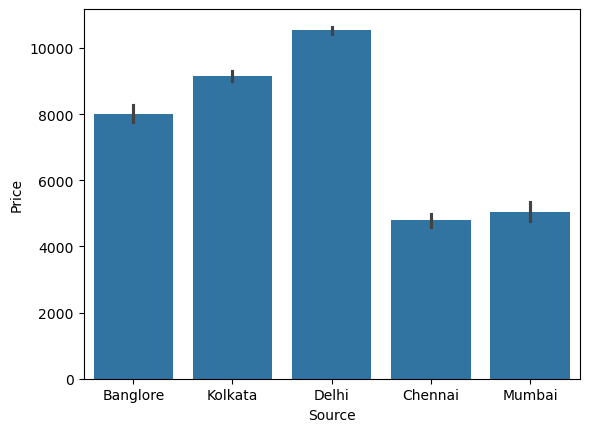

In [14]:
#EDA
sns.barplot(x='Source',y='Price',data=data)

<Axes: xlabel='Destination', ylabel='Price'>

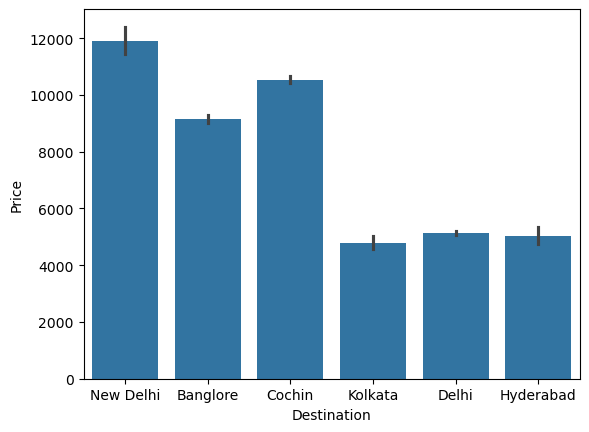

In [15]:
sns.barplot(x='Destination',y='Price',data=data)

In [16]:
data.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

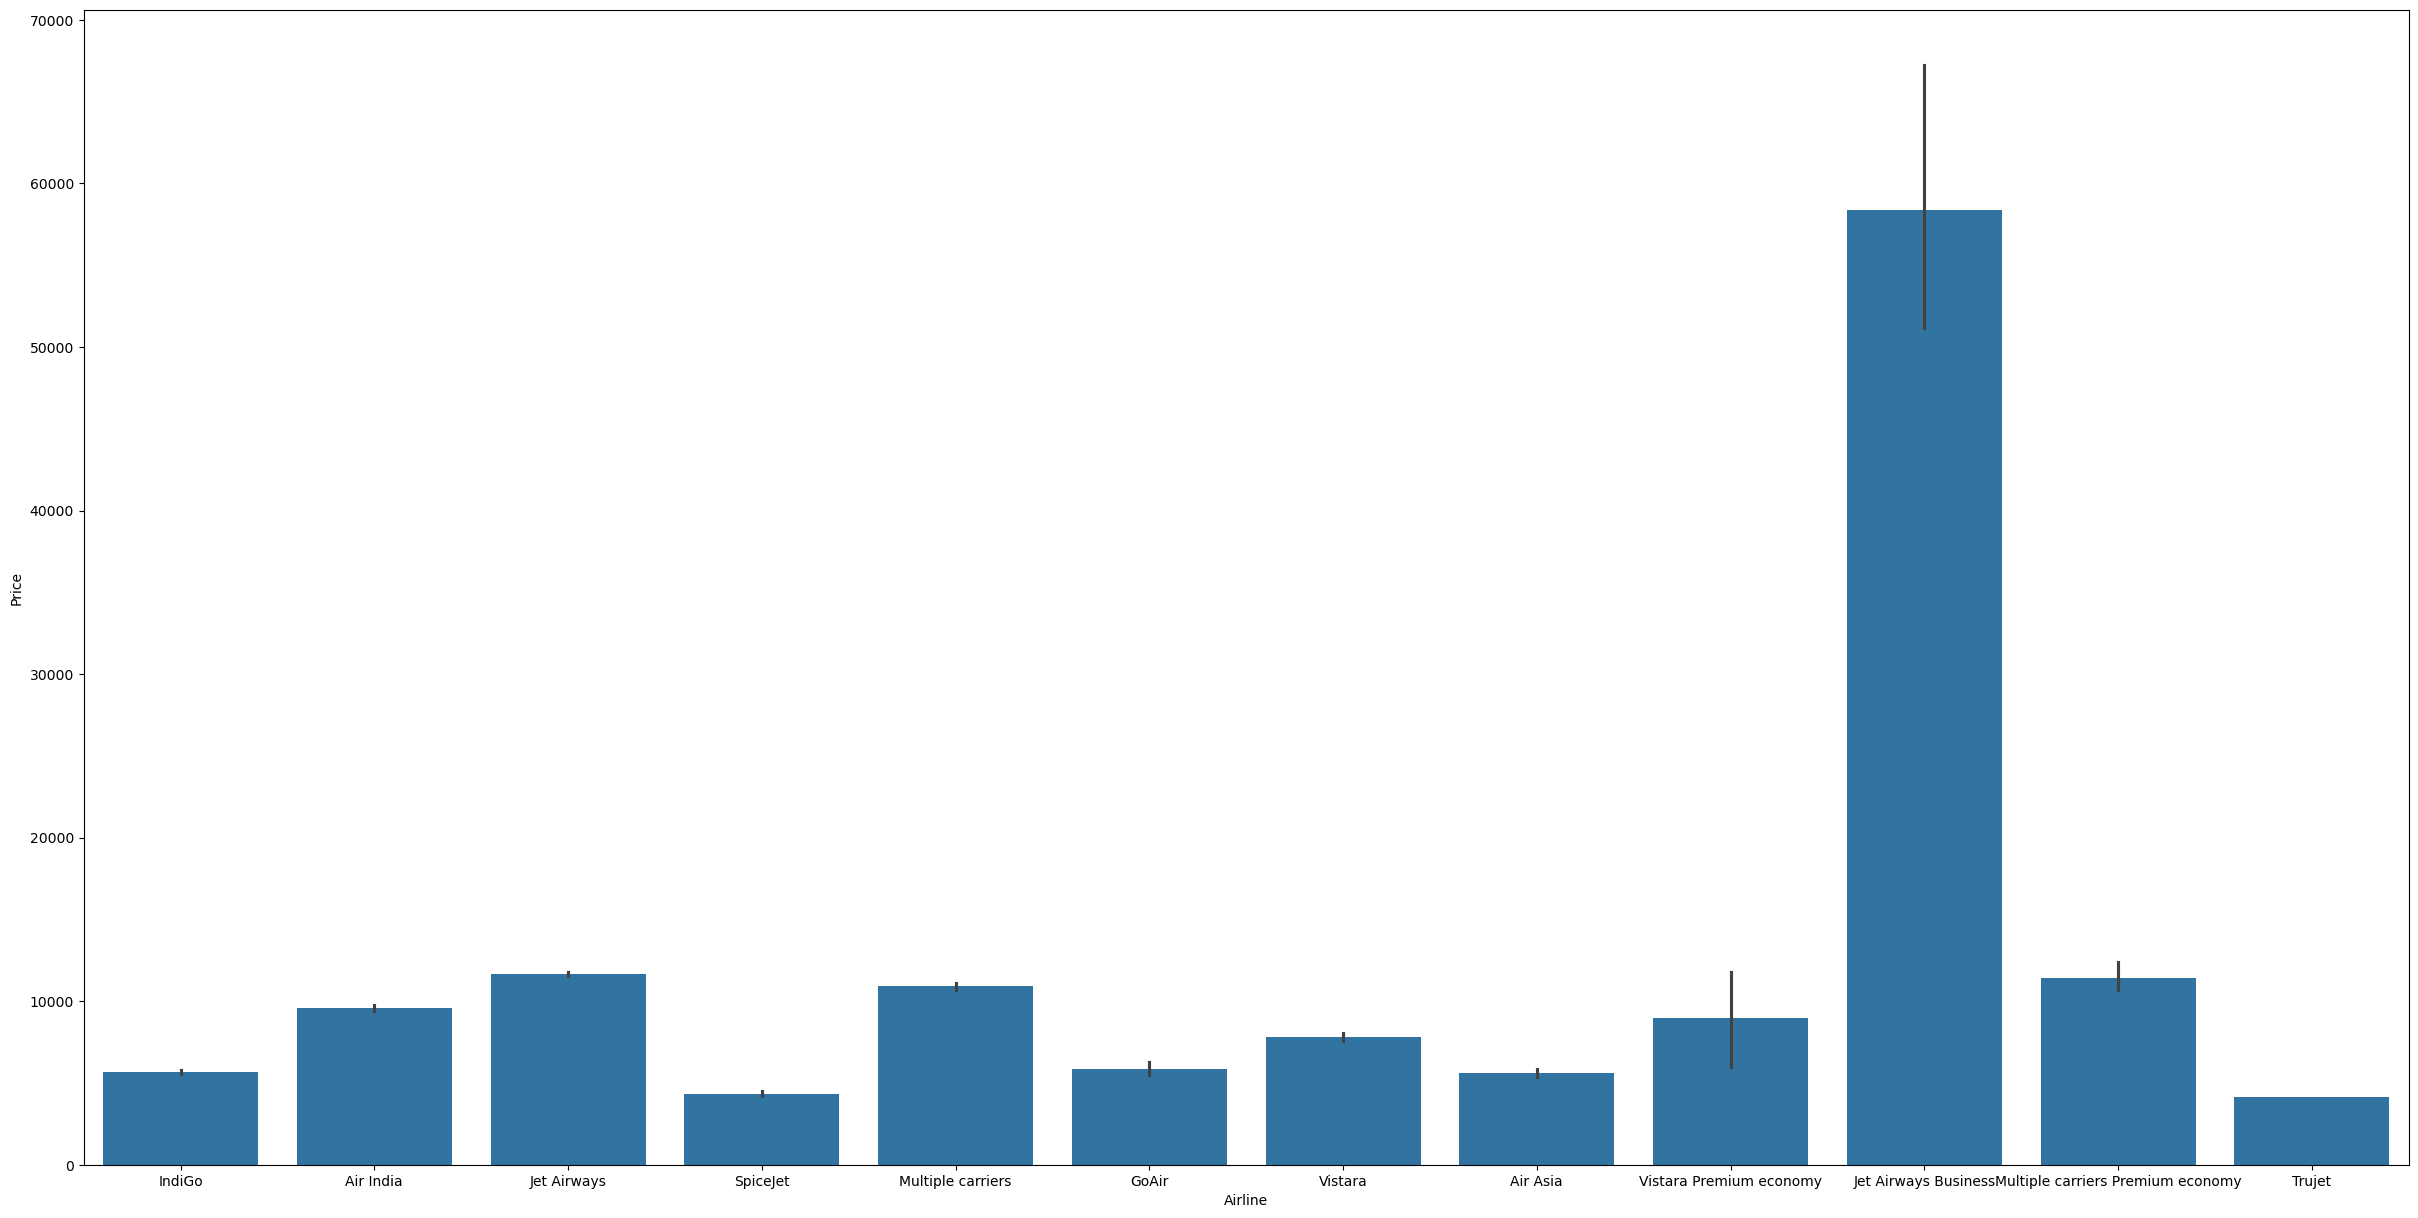

In [17]:

plt.figure(figsize=[30,15])
sns.barplot(x='Airline',y='Price',data=data)
plt.show() 

<Axes: xlabel='Total_Stops', ylabel='Price'>

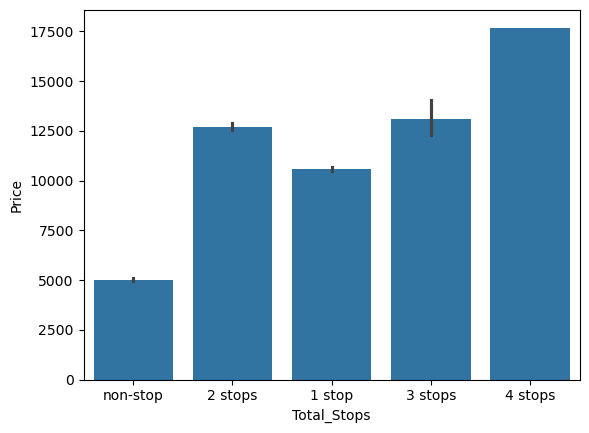

In [18]:
sns.barplot(x='Total_Stops',y='Price',data=data)

In [19]:
#conversion of Object data to Datatime format
data['Journey_day']=pd.to_datetime(data.Date_of_Journey,format="%d/%m/%Y").dt.day
data['Journey_month']=pd.to_datetime(data.Date_of_Journey,format="%d/%m/%Y").dt.month
data['Arrival_hour']=pd.to_datetime(data["Arrival_Time"]).dt.hour
data['Arrival_min']=pd.to_datetime(data["Arrival_Time"]).dt.minute
data['Dep_hour']=pd.to_datetime(data.Dep_Time).dt.hour
data['Dep_min']=pd.to_datetime(data.Dep_Time).dt.minute

In [20]:
data['Duration'].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
3h         261
2h 20m     238
2h 30m     220
2h 40m     158
2h 15m     135
1h 25m     135
2h 25m      98
13h 30m     97
13h 20m     89
3h 15m      88
7h 30m      86
9h 30m      85
8h 40m      81
7h 15m      79
3h 5m       78
5h 30m      72
7h 35m      71
8h          68
7h 5m       65
9h 50m      64
9h          64
5h          63
5h 15m      62
11h 45m     62
11h         62
14h 25m     61
1h 20m      61
6h 35m      60
10h 30m     57
12h 10m     57
22h 55m     57
12h 45m     56
5h 45m      54
16h 5m      53
11h 30m     52
12h 30m     52
7h 20m      52
15h 10m     51
4h 55m      51
8h 25m      50
10h 15m     50
12h         49
10h         49
10h 25m     49
12h 15m     48
6h 15m      47
5h 20m      45
11h 5m      45
26h 55m     44
9h 15m      42
13h         42
8h 55m      42
14h 5m      42
9h 20m      41
9h 35m      41
20h 10m     41
3h 10m      40
17h 5m      40
23h 40m     39
26h 35m     39
21h 15m     39
2

In [21]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [22]:
duration_list=list(data['Duration'])
#duration_list[1]
duration_hours=[]
duration_min=[]
#duration_total=len(duration_list)
for i in range(len(duration_list)):
    #print (i)
    if len(duration_list[i].split()) ==2:
        a,b=duration_list[i].split(" ") #split hour amd min to two variables
        a_hours=a.split('h') #split h from hour
        b_min=b.split('m') #split m from min
    
       # duration_hours.append(a)
        #duration_min.append(b) #=duration_list[i].split(" ")
        duration_hours.append(a_hours[0]) #append hour
        duration_min.append(b_min[0]) #append min
    
    else:
        min="0"
        c_hours=duration_list[i].split('h')
        duration_hours.append(c_hours[0])
        #duration_hours.append(duration_list[i])
        #duration_hours.append(c[0])
        duration_min.append(min) 

#duration_hours_list=[]
#duration_min_list=[]

#for i in range(len(duration_list)):
#    duration_hours_list.append(int(    

In [23]:
duration_min[6474]

'50'

In [24]:
type(a_hours)

list

In [25]:
data["Duration_hours"]=duration_hours
data["Duration_min"]=duration_min

In [26]:
#pd.to_numeric(data.Duration_min)
data['Duration_min']=data['Duration_min'].apply(pd.to_numeric)
data['Duration_hours']=data['Duration_hours'].apply(pd.to_numeric)


In [27]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21,35,16,50,4,45


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Date_of_Journey  10681 non-null  object
 2   Source           10681 non-null  object
 3   Destination      10681 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10681 non-null  object
 6   Arrival_Time     10681 non-null  object
 7   Duration         10681 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10681 non-null  object
 10  Price            10681 non-null  int64 
 11  Journey_day      10681 non-null  int32 
 12  Journey_month    10681 non-null  int32 
 13  Arrival_hour     10681 non-null  int32 
 14  Arrival_min      10681 non-null  int32 
 15  Dep_hour         10681 non-null  int32 
 16  Dep_min          10681 non-null  int32 
 17  Duration_hours   10681 non-null  int

In [29]:
data.drop(["Date_of_Journey","Dep_Time","Arrival_Time","Duration"],axis=1,inplace=True)

In [30]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [31]:
#Conversion of categorical data
#Airline->Nominal data->One-hot encoding

Airline_Data=data['Airline']
Airline_Data=pd.get_dummies(Airline_Data,drop_first=True,dtype='int')
Airline_Data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [32]:
data.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [33]:
Source_Data=data['Source']
Source_Data=pd.get_dummies(Source_Data,drop_first=True,dtype='int')
Source_Data.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [34]:
data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [35]:
Destination_data=data['Destination']
Destination_data=pd.get_dummies(Destination_data,drop_first=True,dtype='int')
Destination_data.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [36]:
data.drop(['Airline','Source','Destination','Additional_Info','Route'],axis=1,inplace=True)

In [37]:
#Total_stops->categorical Data->Label encoding
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [38]:
data.Total_Stops.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops":4},inplace=True)

In [39]:
data.head()

,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_min
0,0,3897,24,3,1,10,22,20,2,50
1,2,7662,1,5,13,15,5,50,7,25
2,2,13882,9,6,4,25,9,25,19,0
3,1,6218,12,5,23,30,18,5,5,25
4,1,13302,1,3,21,35,16,50,4,45


In [40]:
final_data=pd.concat([data,Airline_Data,Source_Data,Destination_data],axis=1)

In [41]:
final_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,13,15,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,4,25,9,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,23,30,18,5,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,1


In [42]:
final_data.shape

(10681, 30)

In [43]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10681 non-null  int64
 1   Price                              10681 non-null  int64
 2   Journey_day                        10681 non-null  int32
 3   Journey_month                      10681 non-null  int32
 4   Arrival_hour                       10681 non-null  int32
 5   Arrival_min                        10681 non-null  int32
 6   Dep_hour                           10681 non-null  int32
 7   Dep_min                            10681 non-null  int32
 8   Duration_hours                     10681 non-null  int64
 9   Duration_min                       10681 non-null  int64
 10  Air India                          10681 non-null  int32
 11  GoAir                              10681 non-null  int32
 12  IndiGo                 

In [44]:
#Correlation between independent and dependent variable
#plt.figure(figsize=(20,15))
#sns.heatmap(final_data.corr(),annot=True)
#plt.show()

In [45]:
x=final_data.drop('Price',axis=1)
y=final_data['Price']

In [46]:
x.shape

(10681, 29)

In [47]:
y.shape

(10681,)

In [48]:
#Selecting important features using ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
f_selection=ExtraTreesRegressor()
f_selection.fit(x,y)

ExtraTreesRegressor()

In [49]:
print(f_selection.feature_importances_)

[2.39200098e-01 1.44881419e-01 5.24889321e-02 2.80064434e-02
 1.85799417e-02 2.46833501e-02 2.15209263e-02 1.14511025e-01
 1.74431096e-02 9.12005218e-03 1.78243667e-03 1.83464402e-02
 1.36893080e-01 6.80869980e-02 2.01536024e-02 8.65603595e-04
 3.27099344e-03 1.21022580e-04 4.91009303e-03 8.18410509e-05
 4.07392083e-04 1.05612196e-02 3.37101743e-03 5.30386207e-03
 1.27503070e-02 1.08947902e-02 6.37623139e-03 5.45870424e-04
 2.48419010e-02]


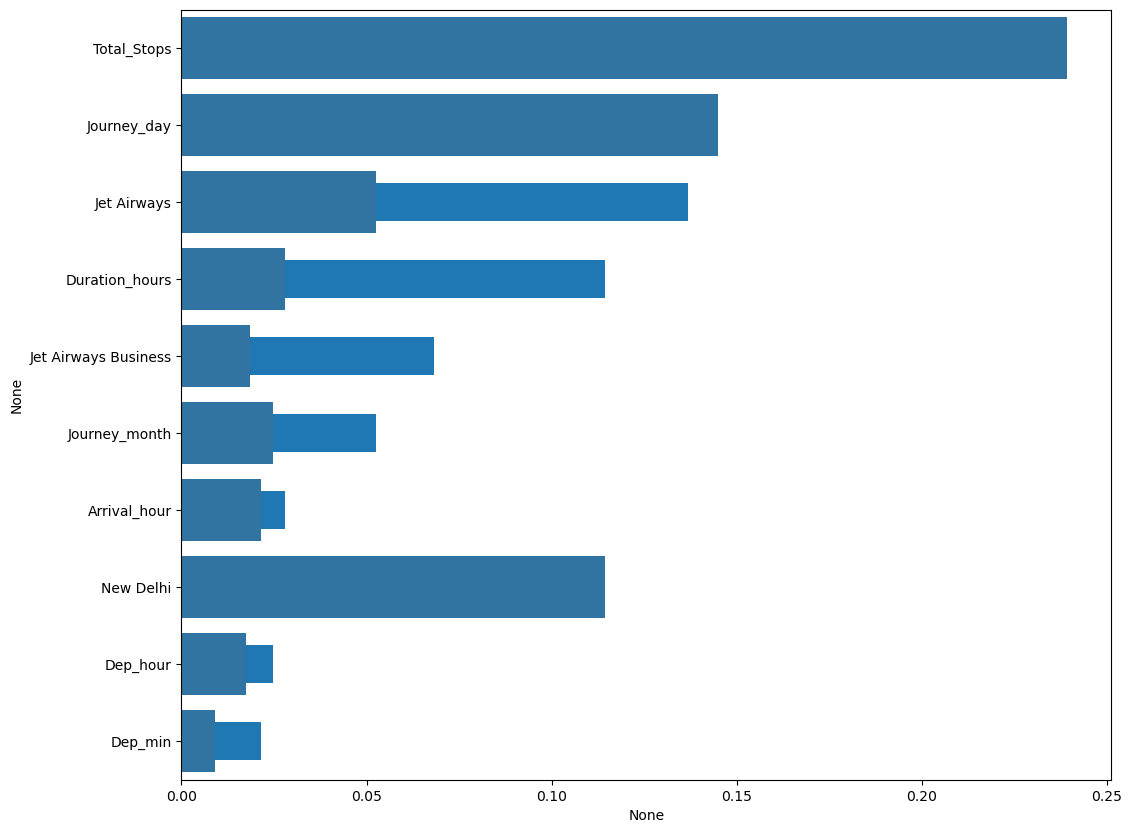

In [50]:
#Graph of feature of importance
plt.figure(figsize=(12,10))
f_importance=pd.Series(f_selection.feature_importances_,index=x.columns)
f_importance.nlargest(10).plot(kind='barh')
#f_importance=pd.Series(f_selection.feature_importances_).nlargest(29)
sns.barplot(x=f_importance,y=x.columns)
plt.show()

In [51]:
#Testing Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
from sklearn.ensemble import RandomForestRegressor
RF_Regressor=RandomForestRegressor()
RF_Regressor.fit(x_train,y_train)

RandomForestRegressor()

In [53]:
y_pred=RF_Regressor.predict(x_test)

In [54]:
y_pred

array([ 6904.81      ,  8340.03      , 10907.0995    , ...,
        7511.61      , 13191.16166667, 14236.2       ])

In [55]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.7991376650258378

In [56]:
metrics.mean_absolute_error(y_test,y_pred)

1146.5382873536928

In [57]:
from sklearn.linear_model import LinearRegression
LR_model=LinearRegression()
LR_model.fit(x_train,y_train)

LinearRegression()

In [58]:
y_hat=LR_model.predict(x_test)

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test,y_hat)

0.6341992965446741

# Hyperparameter Tuning

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=5,stop=25,num=5)]
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=['True','False']

In [63]:
rf_grid= {'n_estimators':n_estimators,
          'max_features':max_features,
          'max_depth':max_depth,
          'min_samples_split':min_samples_split,
          'min_samples_leaf':min_samples_leaf}
          #'bootstrap':bootstrap}

In [64]:
rf_random=RandomizedSearchCV(estimator=RF_Regressor,param_distributions=rf_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [65]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=  11.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=  11.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; tot

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [66]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [67]:
prediction=rf_random.predict(x_test)

In [68]:
print(prediction)

[ 6307.67307759  8617.55002363 10664.610863   ...  7657.83939737
 12739.43015352 13491.28679398]


In [69]:
rf_Regressor1=RandomForestRegressor(n_estimators=800,min_samples_split=5,min_samples_leaf=1,max_depth=25)
rf_Regressor1.fit(x_train,y_train)

RandomForestRegressor(max_depth=25, min_samples_split=5, n_estimators=800)

In [70]:
y_predict=rf_Regressor1.predict(x_test)

In [71]:
r2_score(y_test,y_predict)

0.8129897351798001

# Hyperparameter tuning make a slight changes in  the accuracy of model